# Feature Engineering Guide for ML Students/Enthusiasts/Practitioners

At the beginning of the ML journey, you will see several confusing terms which are also misused by many people. I am not talking about all confusing terms but specifically "feature ...." terms such as "feature engineering, feature extraction, feature selection, feature transformation ...".

## ML Pipeline

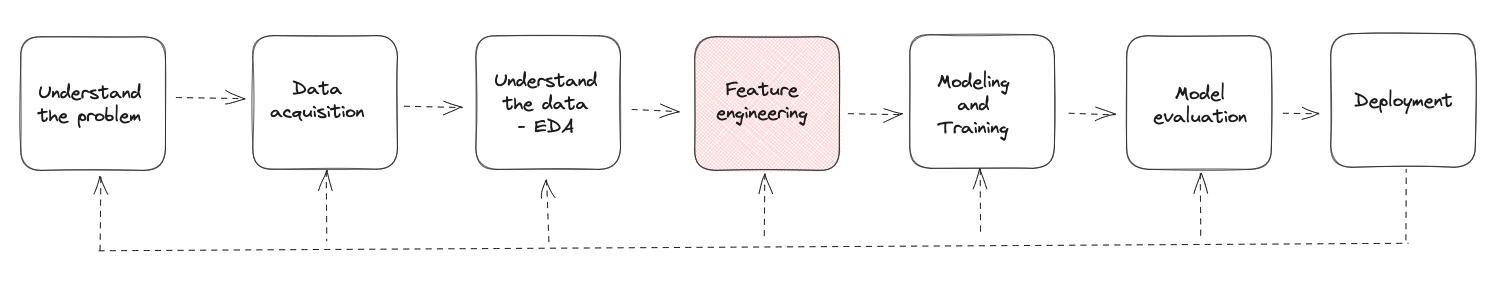

## Feature Engineering Pipeline

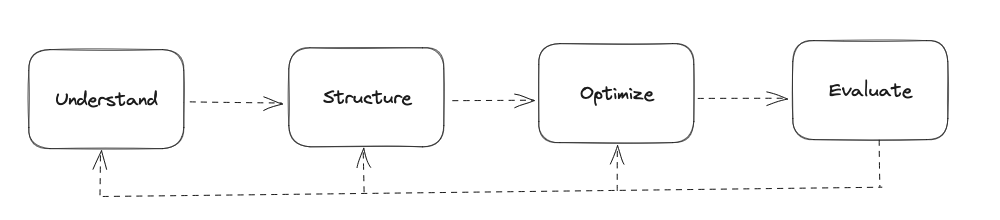

### Feature Understanding

At the beginning of the pipeline, you can have:
- Structured data -> tabular data(columns=features | rows=samples)
- Unstructured data -> image, text, files(pdf, html etc.)

If you have a specific problem, it is usually unstructured data. However, you can also have structured data. 

Obviously the objective of the step is understanding the data, features, characteristics of data, relationships with problem, business requirements. With the following steps, we will reinforce our understanding.  

For example: Let's assume that we want to build a URL-based phishing detection model. Our data can be unstructured text data which contains URLs, e.g. a .txt file. You can inspect the URLs by asking similar questions as below:
- What does a URL look like?
- What are the elements of URL?

Literature review and inspecting benchmarking studies will be helpful at this step.

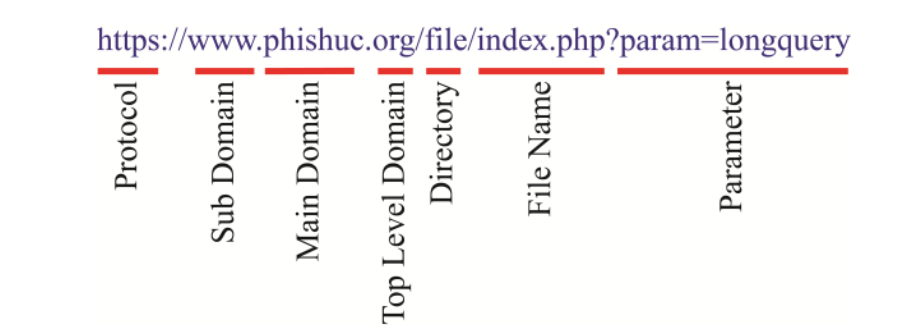

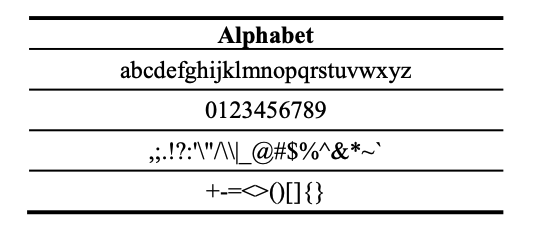

### Feature Structuring

This step is directly related with data types which can be text, image, time-series. You can apply different techniques for each. For instance, our example is text data and we can apply NLP techniques to process and structure our data in tabular form. 

One feature can be the length of URL. We can simply prepare a python script which read the .txt file, calculate the length of the URL, and return the value for each line. Then, we can have:

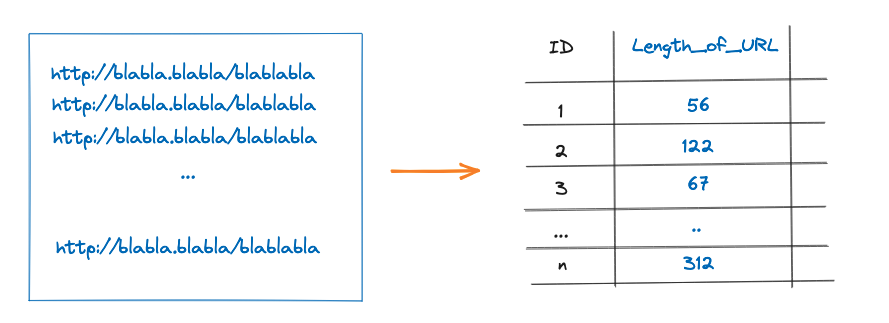

Of course, we will have more features. If you also know the labels, you can add the label column to the end. 

Using the raw data and extracting features as above is called "feature extraction" which is one of the feature engineering types. After the pipeline steps, I will elaborate the techniques.

### Feature Optimization

At this stage, we can apply different techniques to increase the quality of data, i.e. to have the best data for the ML models. This part is usually the most time-consuming step and most of the feature engineering techniques are applied in this step to increase the performance and success of the ML models while decreasing the cost.

We can apply the following feature engineering techniques at this stage:
- Feature improvement
- Feature extraction
- Feature construction
- Feature selection

I will elaborate each of them after the last step of the feature engineering pipeline.

### Feature Evaluation

This step aims to evaluate the feature engineering techniques we applied in the pipeline. Best practice is choosing a single algorithm that can tune fast. Before this step, there are different scenarios and strategies about the features. While experimenting, we will try different strategies with the same algorithm and check the results. Of course, you can utilize more than one algorithm, but be careful, for instance, if you are comparing two different feature sets, you should use the same algorith with the same hyper-parameter values.

Based on the results of this stage, we can go back to the previous steps and enhance our strategies.

Now, let's look at the feature engineering techniques. I will also refer to the above stages during the explanation of the feature engineering techniques.

## Feature Engineering Techniques

1. Feature Improvement
2. Feature Construction
3. Feature Selection
4. Feature Extraction
5. Feature Learning

## 1. Feature improvement

### 1.1 Imputing the missing values

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

In [2]:
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [5]:
df2 = df.copy()

In [6]:
df2.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [7]:
df2['new_feature'] = np.random.rand(len(df2))

In [8]:
import random

missing_values_ratio = 0.2  # 20% missing values

# Generate a list of indices to set as missing values
missing_indices = random.sample(range(len(df2)), int(len(df2) * missing_values_ratio))

# Set the values at the specified indices to None
df2.loc[missing_indices, 'new_feature'] = None

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  new_feature  354 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df2.isnull().any()

age            False
sex            False
bmi            False
bp             False
s1             False
s2             False
s3             False
s4             False
s5             False
s6             False
new_feature     True
dtype: bool

#### Impute the missing ones with KNN Imputer

In [11]:
from sklearn.impute import KNNImputer

In [12]:
imputer = KNNImputer(n_neighbors=2)

In [13]:
df2 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  new_feature  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


__NOTE__: 
1. This is just an example. When you have missing values, you can also decide to remove that feature/column or the rows which have missing values. This is another story.
2. You can check median/mean of that column to fill the missing values. But usually this should be supported by group-based strategy. For instance, if you want to calculate the mean of height, you should consider the related columns like gender. Then, instead of calculating all, you can just use the rows which have same gender, maybe age etc. 

__NOTE 2__: Data type is crucial while deciding the strategy. Check this from the source book of this notebook: _"If we are dealing with data at the nominal or ordinal level, then we can impute—fill in—missing values by using the most common value (the mode) of that feature or by using the nearest neighbor algorithm to “predict” the missing value based on other features. If the feature lives in the interval or ratio level, then we can impute using one of our Pythagorean means or, perhaps, using the median. In general, if our data have a lot of outliers, we would rather use the median (or the geometric/harmonic mean, if appropriate), and we would use the arithmetic mean if our data didn’t have as many outliers (Feature Engineering Bookcamp, Ozdemir, S., 2022)"_

### 1.2 Standardization - Normalization

In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-1.444295e-18,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,2.543215e-18,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.255925e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.854086e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.428596e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.898811e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-6.028360e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-1.788100e-17,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.243486e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.351770e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [16]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer = load_breast_cancer()

In [18]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check min and max values. Features are not scaled.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [20]:
X = df

In [21]:
y = pd.DataFrame(cancer.target, columns=['label'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [24]:
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# check min and max values 
print(np.min(X_train_scaled[:, 0]))
print(np.max(X_train_scaled[:, 0]))

-1.8216975257105874
3.9617575694441363


In [27]:
# let's try Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.min(X_train_scaled[:, 0]))
print(np.max(X_train_scaled[:, 0]))

0.0
0.9999999999999999


### 1.3 Removing outliers

Outliers are usually affecting the model performance negatively. You can consider them as misleading info. So, we should check and clean our data by removing outliers.

Some tips to detect outliers:
1. Check statistical info -> df.describe(). Compare mean with std.
2. Visualization techniques -> boxplot, spot potential outliers. Then inspect them. Detect outliers.
3. Apply statistical methods -> Z-score, IQR, LOF etc.

How to deal with:
1. Imputation
2. Remove/Trimming
3. Benefit from domain knowledge
4. Capping, winsoring etc..

In [28]:
import matplotlib.pyplot as plt

In [29]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,426.0,14.122664,3.534740,7.691000,11.717500,13.270000,15.750000,28.11000
mean texture,426.0,19.198850,4.230755,9.710000,16.180000,18.690000,21.587500,39.28000
mean perimeter,426.0,91.885023,24.304457,47.920000,75.502500,85.935000,104.175000,188.50000
mean area,426.0,654.919484,356.441156,170.400000,421.650000,545.650000,780.400000,2501.00000
mean smoothness,426.0,0.095556,0.013971,0.052630,0.085193,0.094370,0.104275,0.16340
mean compactness,426.0,0.102507,0.051469,0.019380,0.062460,0.090505,0.130575,0.31140
mean concavity,426.0,0.087470,0.078612,0.000000,0.028973,0.061400,0.128775,0.42680
mean concave points,426.0,0.047744,0.037861,0.000000,0.020325,0.033065,0.070403,0.20120
mean symmetry,426.0,0.180024,0.026818,0.116700,0.161425,0.178150,0.195375,0.30400
mean fractal dimension,426.0,0.062607,0.007227,0.049960,0.057510,0.061295,0.065975,0.09744


{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f3825c640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f3825cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f3825c310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f3826e400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f3826e790>],
 'means': []}

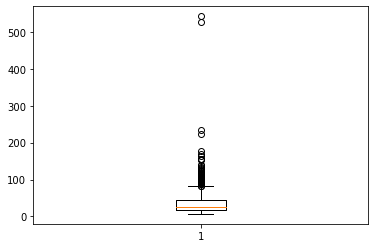

In [30]:
plt.boxplot(X_train['area error'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7f30e90880>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7f30e90fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7f30e904f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7f30e9b700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7f30e9ba90>],
 'means': []}

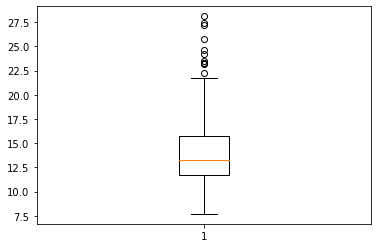

In [31]:
plt.boxplot(X_train['mean radius'])

In [32]:
X_train[X_train['area error']>500]  # we have only two. we can remove.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
212,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


**NOTE**: Feature improvement techniques are various, not only limited with this notebook, obviously. For example, when you have a text data, you can remove noise from text, such as removing stopwords, punctuations etc. This is also a part of feature improvement. Of course, if data is image, then you can remove noise with other methods. 

## 2. Feature Construction

You can add a new feature based on new data OR you can use existing feature to create a new feature.

For instance, when you have height, if you add weight as a new feature(column) OR if you add BMI(Body Mass Index) by using height and weight. Both scenarios are feature construction examples.

Difference between Feature Improvement and Construction!
- When you apply feature construction, the interpretability of the feature will change, drastically!

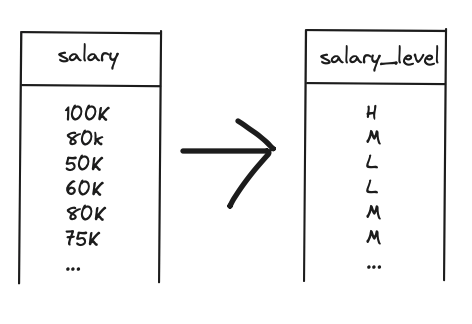

### Example 1

In [33]:
df2.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,new_feature
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0.357791
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0.599044
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0.558485
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0.211312
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0.224023


In [34]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-1.444295e-18,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,2.543215e-18,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.255925e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.854086e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.428596e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.898811e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-6.028360e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-1.788100e-17,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.243486e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.351770e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [35]:
threshold_1 = 0.04
threshold_2 = -0.04

# Create a new column based on the 'bmi' column
df2['bmi_category'] = pd.cut(df2['bmi'], bins=[-float('inf'), threshold_2, threshold_1, float('inf')],
                            labels=['Low', 'Normal', 'High'])


In [36]:
df2.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,new_feature,bmi_category
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0.357791,High
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0.599044,Low
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0.558485,High
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0.211312,Normal
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0.224023,Normal
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,0.247244,Low
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,0.025651,Low
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,0.963351,Normal
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,0.716210,High
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,0.954289,Normal


### Example 2

In [37]:
from sklearn.datasets import fetch_california_housing

In [38]:
data = fetch_california_housing()

In [39]:
data.target_names

['MedHouseVal']

In [40]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [41]:
df3 = pd.DataFrame(data.data, columns=data.feature_names) # I don't need the target column for the moment!

In [42]:
df3.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [44]:
df3.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Let's assume that we learned that certain year is critical in house prices because of a legal regulation. Since the regulation forces to increase the quality of the building material, that can be important. See, domain knowledge is always helpful!

In [45]:
# let's assume that 2000 is the year of that regulation. 
df3['AfterRegulation'] = df3['HouseAge'].apply(lambda x: 1 if x < 23 else 0)

In [46]:
df3.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AfterRegulation
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0


### Example 3

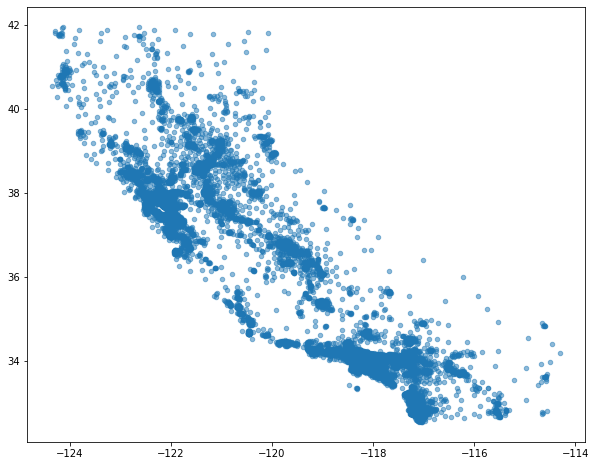

In [47]:
plt.figure(figsize=(10, 8))
plt.scatter(df3['Longitude'], df3['Latitude'], s=20, alpha=0.5)
plt.show()

In [48]:
def categorize_region(row):
    if row['Longitude'] > -118:
        return 1
    elif row['Longitude'] < -118 and row['Latitude'] < 38:
        return 2
    else:
        return 3

# Applying the function to create the 'Region' column
df3['Region'] = df3.apply(categorize_region, axis=1)

In [49]:
df3.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AfterRegulation,Region
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,2
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,0,2
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,0,2
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,0,2
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,0,2
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,0,2


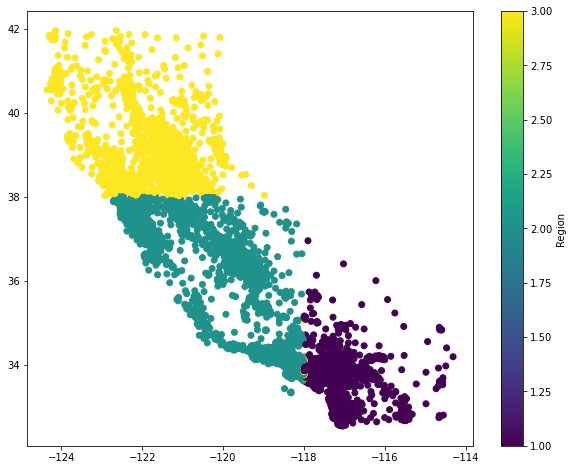

In [50]:
# plotting points with color based on regions
plt.figure(figsize=(10, 8))
plt.scatter(df3['Longitude'], df3['Latitude'], c=df3['Region'], cmap='viridis')
plt.colorbar(label='Region')
plt.show()

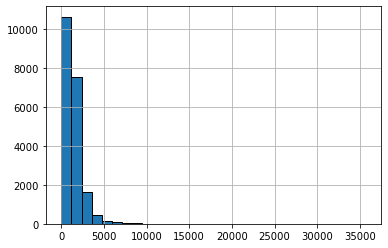

In [51]:
# check this feature -> Population
# TRY FEATURE CONSTRUCTION!
plt.hist(df3['Population'], bins=30, edgecolor='black')
plt.grid(True)
plt.show()

## 3. Feature Selection

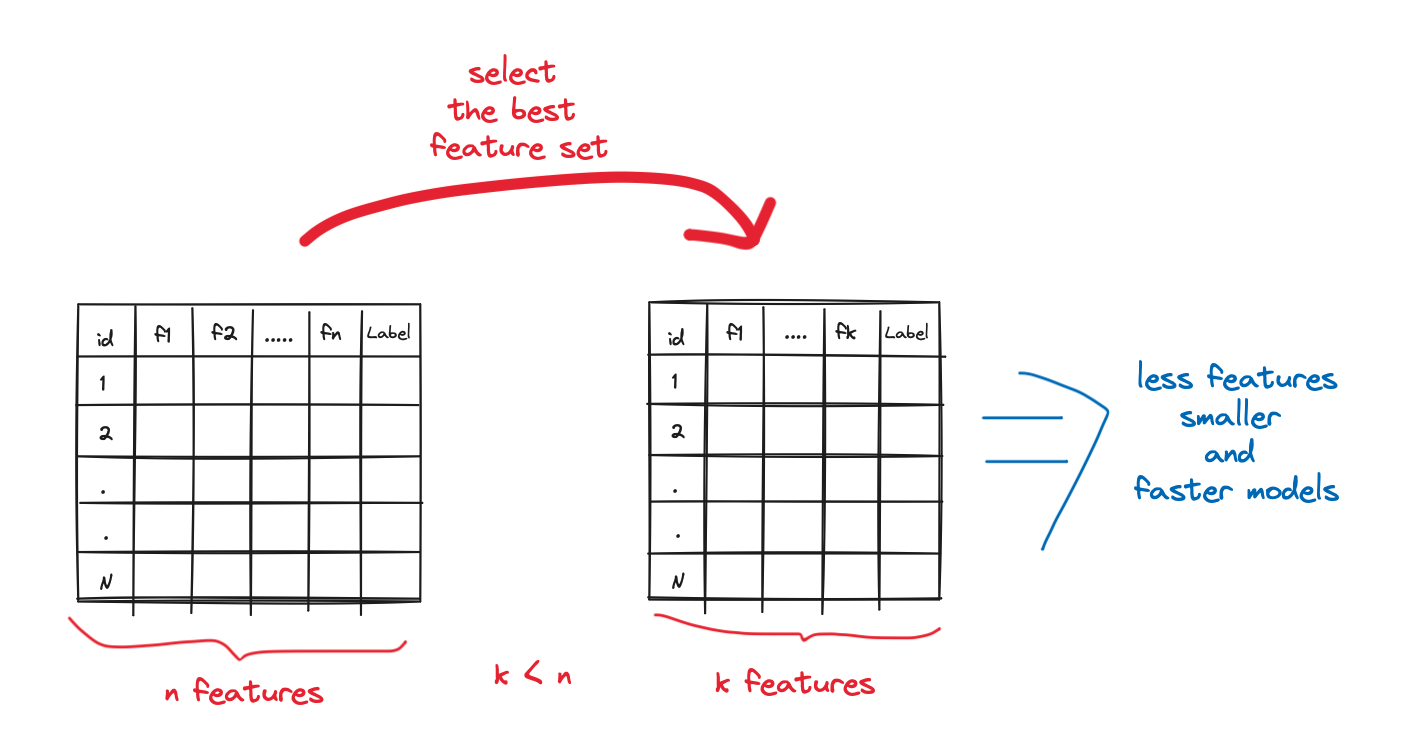

When? 
- Curse of dimensionality
- too many columns
- dependency is present among features
- Speed, cost are important

Feature-Engine - > Feature Selection: 
https://feature-engine.trainindata.com/en/latest/api_doc/selection/index.html

Scikit-learn -> Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html 

In [52]:
df3.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AfterRegulation,Region
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,2


In [53]:
# Let's create X and y
y = data.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [54]:
X = df3
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AfterRegulation,Region
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,2
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1,2
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,2
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,2
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,2
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0,3
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1,3
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1,3
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1,3


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [56]:
print("X train shape -> ", X_train.shape)
print("X test shape -> ", X_test.shape)
print("y train shape -> ", y_train.shape)
print("y test shape -> ", y_test.shape)

X train shape ->  (16512, 10)
X test shape ->  (4128, 10)
y train shape ->  (16512,)
y test shape ->  (4128,)


In [57]:
pd.DataFrame(X_train)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AfterRegulation,Region
18543,3.2404,36.0,4.955882,1.014706,223.0,3.279412,36.97,-122.03,0,2
15147,5.2614,24.0,5.995754,0.936306,1480.0,3.142251,32.87,-116.94,0,1
9966,4.6350,33.0,6.052381,1.109524,1099.0,2.616667,38.46,-122.40,0,3
16781,5.1054,31.0,5.622845,0.933190,1746.0,3.762931,37.67,-122.48,0,2
10892,3.5902,39.0,5.116317,1.080775,2789.0,4.505654,33.72,-117.87,0,1
...,...,...,...,...,...,...,...,...,...,...
19841,2.6711,24.0,5.383420,0.984456,643.0,3.331606,36.43,-119.10,0,2
1768,3.2333,39.0,5.158442,1.109091,1041.0,2.703896,37.95,-122.34,0,2
9929,2.3787,21.0,4.565341,1.011364,834.0,2.369318,38.29,-122.32,1,3
3240,1.8500,14.0,4.541219,1.039427,1077.0,3.860215,36.09,-119.56,1,2


### Removing features with low variance

In [58]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=(.8))
X_train_lv = selector.fit_transform(X_train)

In [59]:
X_train_lv.shape


(16512, 7)

In [60]:
pd.DataFrame(X_train_lv)  # feature_names_in_ AND. n_feature_in_ attributes are available in new versions
# REMOVED FEATURES:
# AveBedrms
# AfterRegulation
# Region
# DON"T FORGET TO UPDATE TEST DATA!!!

,0,1,2,3,4,5,6
0,3.2404,36.0,4.955882,223.0,3.279412,36.97,-122.03
1,5.2614,24.0,5.995754,1480.0,3.142251,32.87,-116.94
2,4.6350,33.0,6.052381,1099.0,2.616667,38.46,-122.40
3,5.1054,31.0,5.622845,1746.0,3.762931,37.67,-122.48
4,3.5902,39.0,5.116317,2789.0,4.505654,33.72,-117.87
...,...,...,...,...,...,...,...
16507,2.6711,24.0,5.383420,643.0,3.331606,36.43,-119.10
16508,3.2333,39.0,5.158442,1041.0,2.703896,37.95,-122.34
16509,2.3787,21.0,4.565341,834.0,2.369318,38.29,-122.32
16510,1.8500,14.0,4.541219,1077.0,3.860215,36.09,-119.56


### Another simple approach - Check feature importances

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = regressor.feature_importances_

In [62]:
dict(sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True))

{'MedInc': 0.5216612184299508,
 'AveOccup': 0.13978144586475555,
 'Latitude': 0.08681823624008964,
 'Longitude': 0.08592746689451745,
 'HouseAge': 0.055905067544333914,
 'AveRooms': 0.0469763371667282,
 'Population': 0.030702178051971854,
 'AveBedrms': 0.029411018960977482,
 'Region': 0.0017685539483535285,
 'AfterRegulation': 0.001048476898321694}

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [64]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)

Mean Absolute Error: 0.31938155503875987
Mean Squared Error: 0.2421200465877003
R-squared (R²): 0.8122738446218422


In [65]:
# train the RF with only four features according to the feature importance info
X_train_with_fs = X_train[['MedInc', 'AveOccup', 'Latitude', 'Longitude']]

In [66]:
X_train_with_fs.columns

Index(['MedInc', 'AveOccup', 'Latitude', 'Longitude'], dtype='object')

In [67]:
# create a test data with same columns
X_test_with_fs = X_test[['MedInc', 'AveOccup', 'Latitude', 'Longitude']]

In [68]:
# Create the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the regressor to your data
regressor.fit(X_train_with_fs, y_train)

# Get feature importances
feature_importances = regressor.feature_importances_

In [69]:
y_pred = regressor.predict(X_test_with_fs)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [70]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)

Mean Absolute Error: 0.31450414014050404
Mean Squared Error: 0.24247540133631654
R-squared (R²): 0.8119983226991709


### Feature Selection Methods - Overall

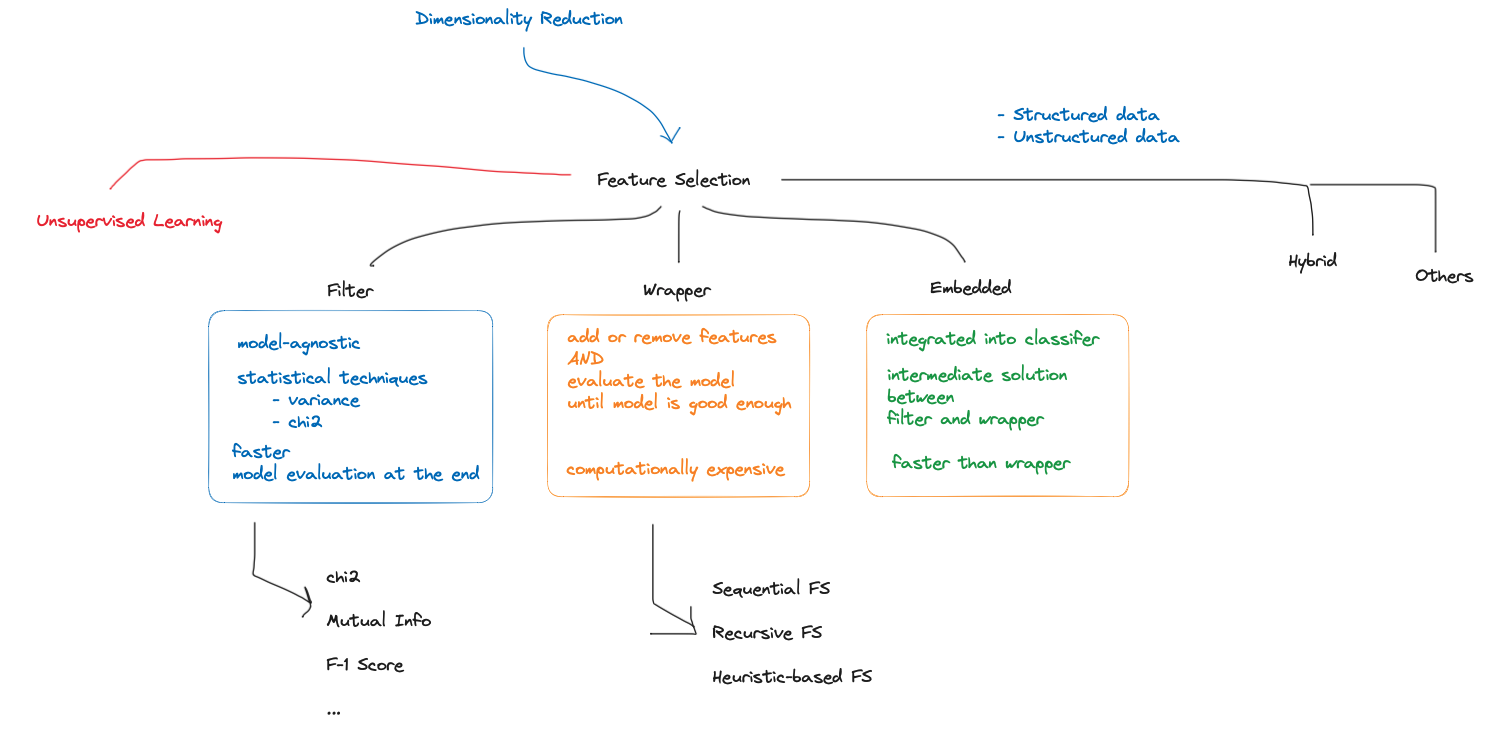

In [ ]:
# recursive feature elimination


You can check these papers:
- https://www.frontiersin.org/articles/10.3389/fbinf.2022.927312/full#:~:text=In%20an%20embedded%20method%2C%20feature,produce%20the%20best%20classification%20accuracy.
- https://link.springer.com/article/10.1007/s10489-021-02550-9

## 4. Feature Extraction

Mostly, by using raw data such as text, image, files(html, pdf, etc.) and creating new features. Domain knowdlege, literature review, benchmarking projects will be critical. Remember the example of creating features by using raw URL texts. Another example can be 


- Vectorization: CountVectorizer, TFIDFVectorizer etc. -> Text | Text Classification etc.
- HOG: Histograms of Oriented Gradients -> Image | Object Recognition

Also, followings are considered as feature extraction techniques:
- PCA: Principal Component Analysis
- SVD: Singular Value Decomposition



Data type is important while deciding the feature extraction approaches, tools.

Scikit-learn's feature extraction:
- Load features from dictionaries -> DictVectorizer
- Feature hashing
- Text feature extraction
- Image faeture extraction

### Examples

### 1. DictVectorizer | Dictionary -> Tabular

In [72]:
from sklearn.feature_extraction import DictVectorizer

In [71]:
raw_data = [
    {'age': 32, 'country': 'Turkiye'},
    {'age': 28, 'country': 'USA'},
    {'age': 52, 'country': 'India'}
]

In [74]:
vectorizer = DictVectorizer()
vectorizer.fit_transform(raw_data).toarray()

array([[32.,  0.,  1.,  0.],
       [28.,  0.,  0.,  1.],
       [52.,  1.,  0.,  0.]])

In [76]:
vectorizer.get_feature_names_out()

array(['age', 'country=India', 'country=Turkiye', 'country=USA'],
      dtype=object)

In [77]:
pd.DataFrame(vectorizer.fit_transform(raw_data).toarray(), columns=vectorizer.get_feature_names_out())

,age,country=India,country=Turkiye,country=USA
0,32.0,0.0,1.0,0.0
1,28.0,0.0,0.0,1.0
2,52.0,1.0,0.0,0.0


### 2. CountVectorizer | Text -> Tabular

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
import string

In [79]:
corpus = [
    'Transforming data enhances machine learning model performance.',
    'Create interaction terms for insightful feature engineering.',
    'Handle missing data with imputation or binary flags.',
    'Scale features for improved machine learning model accuracy.',
 ]

In [83]:
# create an example preprocessing function - remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

In [84]:
# Create a CountVectorizer object with punctuation removal
vectorizer = CountVectorizer(preprocessor=remove_punctuation)
X = vectorizer.fit_transform(corpus)

In [85]:
X.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0]])

In [88]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,Create,Handle,Scale,Transforming,accuracy,binary,data,engineering,enhances,feature,...,insightful,interaction,learning,machine,missing,model,or,performance,terms,with
0,0,0,0,1,0,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
1,1,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0


### 3. Web scraping and HTML to Tabular Data

In [89]:
html_content = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>HTML Example</title>
</head>
<body>
    <h1>Hello, World!</h1>
    <p>This is a simple HTML example.</p>
    <button onclick="openPopup()">Click me for a popup</button>
    <div id="hiddenDiv" style="display: none;">This is a hidden div.</div>
</body>
<script>
    function openPopup() {
        alert("This is a popup!");
    }
</script>
</html>"""


In [90]:
!pip install beautifulsoup4

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.1.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [91]:
from bs4 import BeautifulSoup

def number_of_pop_up(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    pop_ups = soup.find_all('button', {'onclick': 'openPopup()'})
    return len(pop_ups)

def number_of_hidden_state(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    hidden_divs = soup.find_all('div', {'style': 'display: none;'})
    return len(hidden_divs)


In [102]:
pop_up_count = number_of_pop_up(html_content)
hidden_state_count = number_of_hidden_state(html_content)

data = {
    "number_of_pop_up": [pop_up_count, pop_up_count+2],
    "number_of_hidden_state": [hidden_state_count, hidden_state_count-1]
}

In [103]:
pd.DataFrame(data)

,number_of_pop_up,number_of_hidden_state
0,1,1
1,3,0


## 5. Feature Learning

Keywords
- Automatic
- By models (Deep Learning)

Feature Learning can be carried out by Supervised, Unsupervised or Semi-supervised learning types.

Important advantage over traditional ML methods!
- Feature bias in traditional methods
- No human -> Robustness

https://arxiv.org/pdf/2206.01717.pdf

Objective:
- A typical feature learning goal is to collect only the optimal features, limiting the feature set size to only maintain the strongest and most common features, rather than an exhaustive set of all the features possible.

https://link.springer.com/chapter/10.1007/978-3-319-33762-3_10

### Example 

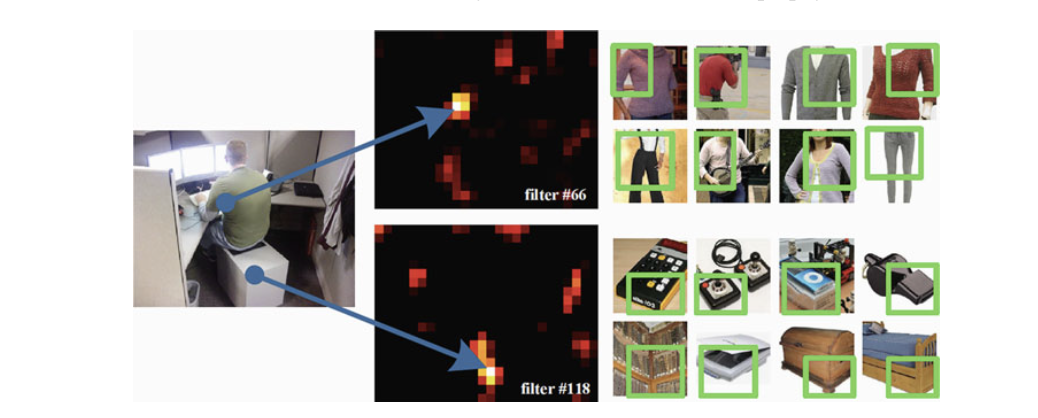

the illustration sources --> He, K., Zhang, X., Ren, S., Sun, J.: Spatial pyramid pooling in deep convolutional networks for visual recognition.
ECCV (2014)

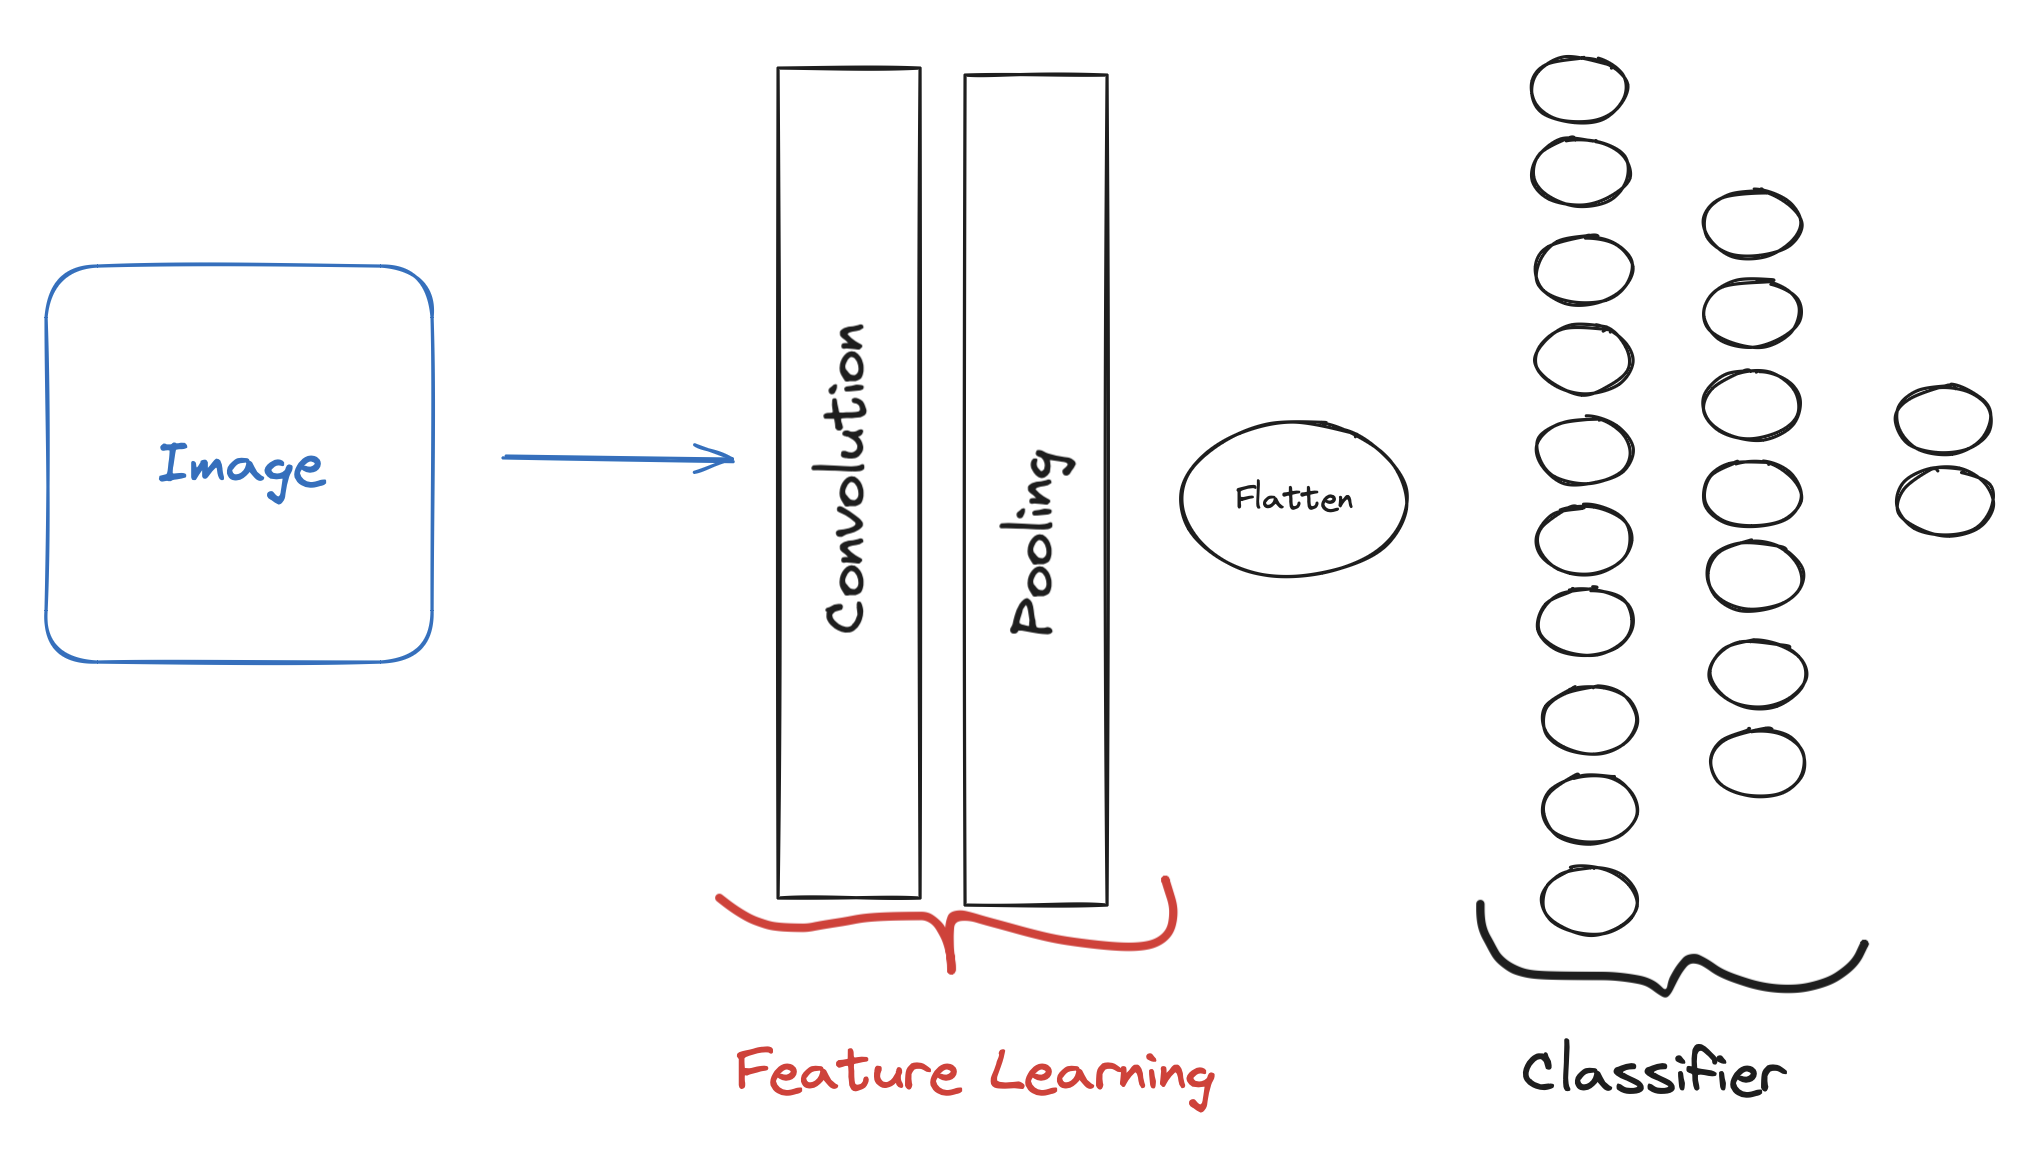

# Conclusion

Feature Engineering Techniques:
- Feature Improvement
- Feature Construction
- Feature Selection
- Feature Extraction
- Feature Learning*

### Feature Improvement
Interpretability of the features are not changing. Existing features' contribution increases.
- Handling with missing values
- Scaling
- Dealing with outliers

### Feature Construction
Interpretability of the features are changing. Existing features' meaning changes or new features are constructed based on the existing features.
- Salary(Numerical) -> Income Status(Categorical)
- Height + Weight -> BMI

### Feature Selection